# Лабораторная работа №4

ФИО: Кузнецова Анна Андреевна  
Группа: БИВТ-21-2

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Пример импорта данных. Грузим данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
path_to_dataset = "C:/Users/User/Documents/student_data.csv"
data = pd.read_csv(path_to_dataset, sep=',')

## 2. Понимаем, какая перед нами задача

Перед нами задача регрессии. Нашей целью является предсказание оценки учеников. Задача регрессии заключается в предсказании непрерывной переменной(оценки) на основе других факторов(пол, возраст и тд)

## 3. Делаем предобработку данных

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Разделение на матрицу признаков X и целевую переменную y
X = data.drop(columns=['G1', 'G2', 'G3']) #удаляем столбцы, которые не являются признаком
y = data[['G1', 'G2', 'G3']] #выбираем целевые переменные

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Инициализация и применение StandardScaler
standart_scaler = StandardScaler()
y_train_standart_scaled = standart_scaler.fit_transform(y_train)
y_test_standart_scaled = standart_scaler.transform(y_test)

# Инициализация и применение MinMaxScaler
minmax_scaler = MinMaxScaler()
y_train_minmax_scaled = minmax_scaler.fit_transform(y_train)
y_test_minmax_scaled = minmax_scaler.transform(y_test)

# One-Hot Encoding
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_one_hot_encoded = one_hot_encoder.fit_transform(X_train).toarray()
X_test_one_hot_encoded = one_hot_encoder.transform(X_test).toarray()

## Оформление данных в виде класса dataset

In [4]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)  # Переводим признаки в тензоры
        self.y = torch.tensor(y, dtype=torch.float32)  # Переводим целевые переменные в тензоры
    
    def __len__(self):
        return len(self.X)  # Возвращаем размер датасета
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]  # Возвращаем признаки и соответствующую целевую переменную по индексу

# Создание экземпляров тренировочной и тестовой выборок
train_dataset = MyDataset(X_train_one_hot_encoded, y_train_minmax_scaled)
test_dataset = MyDataset(X_test_one_hot_encoded, y_test_minmax_scaled)

# Создание DataLoader для тренировочной и тестовой выборок
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Обучение на тренировочном множестве

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Определение класса модели
class SimpleNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size)  # Однослойный линейный слой
        
    def forward(self, x):
        x = self.fc(x)
        return x

# Определение параметров модели
input_size = X_train_one_hot_encoded.shape[1]  # Размерность входных данных
output_size = 1  # Размерность выходных данных (в нашем случае один выход)
learning_rate = 0.01

# Создание экземпляра модели
model_SimpleNet = SimpleNet(input_size, output_size)

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.SGD(model_SimpleNet.parameters(), lr=learning_rate)

# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    model_SimpleNet.train()  # Установка модели в режим обучения
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Прямой проход
        outputs = model_SimpleNet(inputs)
        loss = criterion(outputs, labels)
        
        # Обратное распространение и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_dataloader)}")

Epoch 1/10, Loss: 0.2759242609143257
Epoch 2/10, Loss: 0.08849866837263107
Epoch 3/10, Loss: 0.08071281164884567
Epoch 4/10, Loss: 0.07751585096120835
Epoch 5/10, Loss: 0.07489504814147949
Epoch 6/10, Loss: 0.07272210121154785
Epoch 7/10, Loss: 0.07063665091991425
Epoch 8/10, Loss: 0.06861868724226952
Epoch 9/10, Loss: 0.06641974300146103
Epoch 10/10, Loss: 0.0647770881652832


In [7]:
# Нейросеть посложнее
# Определение нейросети
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Параметры нейросети
input_size = X_train_one_hot_encoded.shape[1]
hidden_size = 64  # Размер скрытого слоя
output_size = 1  # Размер выходного слоя

# Создание нейросети
model_NeuralNetwork = NeuralNetwork(input_size, hidden_size, output_size)

# Оптимизатор
learning_rate = 0.001
optimizer = optim.Adam(model_NeuralNetwork.parameters(), lr=learning_rate)

# Функция потерь
criterion = nn.MSELoss()

# Обучение нейросети
num_epochs = 100
for epoch in range(num_epochs):
    # Переводим модель в режим обучения
    model_NeuralNetwork.train()
    
    # Проходим по каждому батчу в тренировочном датасете
    for inputs, targets in train_dataloader:
        # Обнуляем градиент
        optimizer.zero_grad()
        
        # Передаем данные через нейросеть
        outputs = model_NeuralNetwork(inputs)
        
        # Вычисляем функцию потерь
        loss = criterion(outputs, targets)
        
        # Рассчитываем градиенты
        loss.backward()
        
        # Обновляем параметры модели
        optimizer.step()

    # Выводим промежуточные результаты
    if (epoch+1) % 10 == 0:
        print(f'Эпоха [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Эпоха [10/100], Loss: 0.0416
Эпоха [20/100], Loss: 0.0291
Эпоха [30/100], Loss: 0.0222
Эпоха [40/100], Loss: 0.0122
Эпоха [50/100], Loss: 0.0137
Эпоха [60/100], Loss: 0.0100
Эпоха [70/100], Loss: 0.0087
Эпоха [80/100], Loss: 0.0096
Эпоха [90/100], Loss: 0.0046
Эпоха [100/100], Loss: 0.0030


In [8]:
# Нейросеть еще сложнее
# Определение нейросети
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(NeuralNetwork, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Параметры нейросети
input_size = X_train_one_hot_encoded.shape[1]
hidden_sizes = [64, 32, 16]  # Размеры скрытых слоев
output_size = 1  # Размер выходного слоя

# Создание нейросети
model_HardNeuralNetwork = NeuralNetwork(input_size, hidden_sizes, output_size)

# Оптимизатор
learning_rate = 0.001
optimizer = optim.Adam(model_HardNeuralNetwork.parameters(), lr=learning_rate)

# Функция потерь
criterion = nn.MSELoss()

# Обучение нейросети
num_epochs = 100
for epoch in range(num_epochs):
    # Переводим модель в режим обучения
    model_HardNeuralNetwork.train()
    
    # Проходим по каждому батчу в тренировочном датасете
    for inputs, targets in train_dataloader:
        # Обнуляем градиент
        optimizer.zero_grad()
        
        # Передаем данные через нейросеть
        outputs = model_HardNeuralNetwork(inputs)
        
        # Вычисляем функцию потерь
        loss = criterion(outputs, targets)
        
        # Рассчитываем градиенты
        loss.backward()
        
        # Обновляем параметры модели
        optimizer.step()

    # Выводим промежуточные результаты
    if (epoch+1) % 10 == 0:
        print(f'Эпоха [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Эпоха [10/100], Loss: 0.0316
Эпоха [20/100], Loss: 0.0260
Эпоха [30/100], Loss: 0.0186
Эпоха [40/100], Loss: 0.0104
Эпоха [50/100], Loss: 0.0052
Эпоха [60/100], Loss: 0.0047
Эпоха [70/100], Loss: 0.0062
Эпоха [80/100], Loss: 0.0050
Эпоха [90/100], Loss: 0.0046
Эпоха [100/100], Loss: 0.0072


## Подсчет loss на train и test множествах

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([15, 3])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Эпоха [1/100], Обучающий Loss: 0.1596, Тестовый Loss: 0.1123
Эпоха [2/100], Обучающий Loss: 0.0852, Тестовый Loss: 0.0532
Эпоха [3/100], Обучающий Loss: 0.0473, Тестовый Loss: 0.0542
Эпоха [4/100], Обучающий Loss: 0.0557, Тестовый Loss: 0.0503
Эпоха [5/100], Обучающий Loss: 0.0453, Тестовый Loss: 0.0437
Эпоха [6/100], Обучающий Loss: 0.0430, Тестовый Loss: 0.0450
Эпоха [7/100], Обучающий Loss: 0.0436, Тестовый Loss: 0.0430
Эпоха [8/100], Обучающий Loss: 0.0408, Тестовый Loss: 0.0405
Эпоха [9/100], Обучающий Loss: 0.0395, Тестовый Loss: 0.0402
Эпоха [10/100], Обучающий Loss: 0.0386, Тестовый Loss: 0.0388
Эпоха [11/100], Обучающий Loss: 0.0369, Тестовый Loss: 0.0381
Эпоха [12/100], Обучающий Loss: 0.0360, Тестовый Loss: 0.0376
Эпоха [13/100], Обучающий Loss: 0.0351, Тестовый Loss: 0.0364
Эпоха [14/100], Обучающий Loss: 0.0337, Тестовый Loss: 0.0358
Эпоха [15/100], Обучающий Loss: 0.0327, Тестовый Loss: 0.0354
Эпоха [16/100], Обучающий Loss: 0.0317, Тестовый Loss: 0.0352
Эпоха [17/100], О

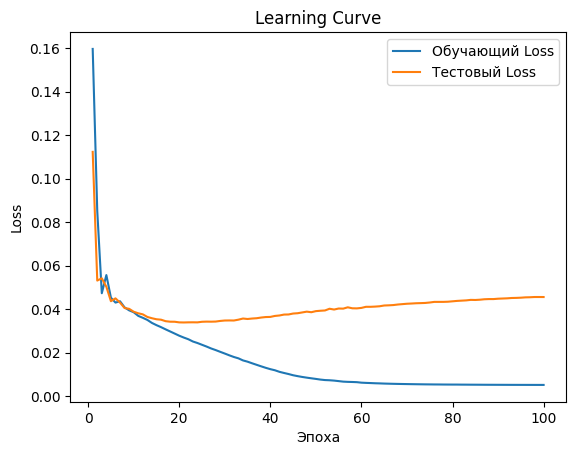

In [9]:
# Определение нейросети
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(NeuralNetwork, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Функция для обучения модели и визуализации learning curve
def train_model(model, criterion, optimizer, train_dataloader, test_dataloader, num_epochs):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        # Переводим модель в режим обучения
        model.train()
        
        # Обучение на тренировочном наборе данных
        train_loss = 0.0
        for inputs, targets in train_dataloader:
            # Обнуляем градиент
            optimizer.zero_grad()
            
            # Передаем данные через нейросеть
            outputs = model(inputs)
            
            # Вычисляем функцию потерь
            loss = criterion(outputs, targets)
            train_loss += loss.item() * inputs.size(0)
            
            # Рассчитываем градиенты
            loss.backward()
            
            # Обновляем параметры модели
            optimizer.step()
        
        # Сохраняем значение loss для обучающего набора данных
        train_loss = train_loss / len(train_dataloader.dataset)
        train_losses.append(train_loss)

        # Оценка loss на тестовом наборе данных
        model.eval()
        test_loss = 0.0
        for inputs, targets in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
        test_loss = test_loss / len(test_dataloader.dataset)
        test_losses.append(test_loss)
        
        # Выводим результаты обучения на каждой эпохе
        print(f'Эпоха [{epoch+1}/{num_epochs}], Обучающий Loss: {train_loss:.4f}, Тестовый Loss: {test_loss:.4f}')

    # Визуализация learning curve
    plt.plot(range(1, num_epochs+1), train_losses, label='Обучающий Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Тестовый Loss')
    plt.xlabel('Эпоха')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Параметры нейросети
input_size = X_train_one_hot_encoded.shape[1]
hidden_sizes = [64, 32, 16]  # Размеры скрытых слоев
output_size = 1  # Размер выходного слоя

# Создание нейросети
model = NeuralNetwork(input_size, hidden_sizes, output_size)

# Оптимизатор
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Функция потерь
criterion = nn.MSELoss()

# Обучение нейросети и визуализация learning curve
num_epochs = 100
train_model(model, criterion, optimizer, train_dataloader, test_dataloader, num_epochs)

## Подсчет метрики на train и test множествах (MAE)

In [10]:
# Функция для вычисления MAE
def calculate_mae(model, data_loader):
    model.eval()  # Переводим модель в режим оценки (evaluation)
    mae = 0.0
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            mae += torch.abs(outputs - targets).sum().item()
    mae = mae / len(data_loader.dataset)
    return mae

# Вычисление MAE на train и test множествах
train_mae_SimpleNet = calculate_mae(model_SimpleNet, train_dataloader)
test_mae_SimpleNet = calculate_mae(model_SimpleNet, test_dataloader)

print(f'MAE на train множестве SimpleNet: {train_mae_SimpleNet:.4f}')
print(f'MAE на test множестве SimpleNet: {test_mae_SimpleNet:.4f}')

train_mae_NeuralNetwork = calculate_mae(model_NeuralNetwork, train_dataloader)
test_mae_NeuralNetwork = calculate_mae(model_NeuralNetwork, test_dataloader)

print(f'MAE на train множестве NeuralNetwork: {train_mae_NeuralNetwork:.4f}')
print(f'MAE на test множестве NeuralNetwork: {test_mae_NeuralNetwork:.4f}')

train_mae_HardNeuralNetwork = calculate_mae(model_HardNeuralNetwork, train_dataloader)
test_mae_HardNeuralNetwork = calculate_mae(model_HardNeuralNetwork, test_dataloader)

print(f'MAE на train множестве HardNeuralNetwork: {train_mae_HardNeuralNetwork:.4f}')
print(f'MAE на test множестве HardNeuralNetwork: {test_mae_HardNeuralNetwork:.4f}')

MAE на train множестве SimpleNet: 0.5927
MAE на test множестве SimpleNet: 0.6242
MAE на train множестве NeuralNetwork: 0.1588
MAE на test множестве NeuralNetwork: 0.4973
MAE на train множестве HardNeuralNetwork: 0.1540
MAE на test множестве HardNeuralNetwork: 0.5514


## Сравнение метрики относительно train/test, так и относительно разных моделей.

Какая модель справилась лучше с поставленной задачей?
На тестовом наборе значение MAE наименьшее у NeuralNetwork, поэтому она справилась лучше с поставленной задачей
Имеет ли место переобучение?
Модели NeuralNetwork и HardNeuralNetwork имеют существенные отличия в результатах между треин и тестом, что может говорить о переобучении
Имеет ли место недообучение?
SimpleNet имеет довольно высокий показатель на треин множестве, что может быть признаком недообучения, но в то же время показатель МАЕ на тест множестве не сильно отличается
Как можно улучшить метрики моделей?
Можно увеличить набор данных, на котором происходит обучение